In [70]:
import pandas as pd
from my_tools import fetch_data #python function which u created for fetching datasets and downloading datasets.
import numpy as np

In [71]:
dataset_content=fetch_data("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

Dataset fetched and saved successfully.


In [72]:
if dataset_content:
    with open("housing.csv",'w') as file: #creates housing.csv file in the parent directory
        file.write(dataset_content)
else:
    print("failed to fetch data")

# Data Analysis

In [73]:
housing=pd.read_csv('housing.csv')

In [74]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [75]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [76]:
len(housing.keys()) #no.of features

10

In [77]:
housing.describe() #Null Values are ignored

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [78]:
%matplotlib inline 
#command which tells jupyter notebook to use its own backend for rendering plots.
#CAN BE USED ONLY IN JUPYTER NOTEBOOKS

In [79]:
np.unique(housing['ocean_proximity'])

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [80]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

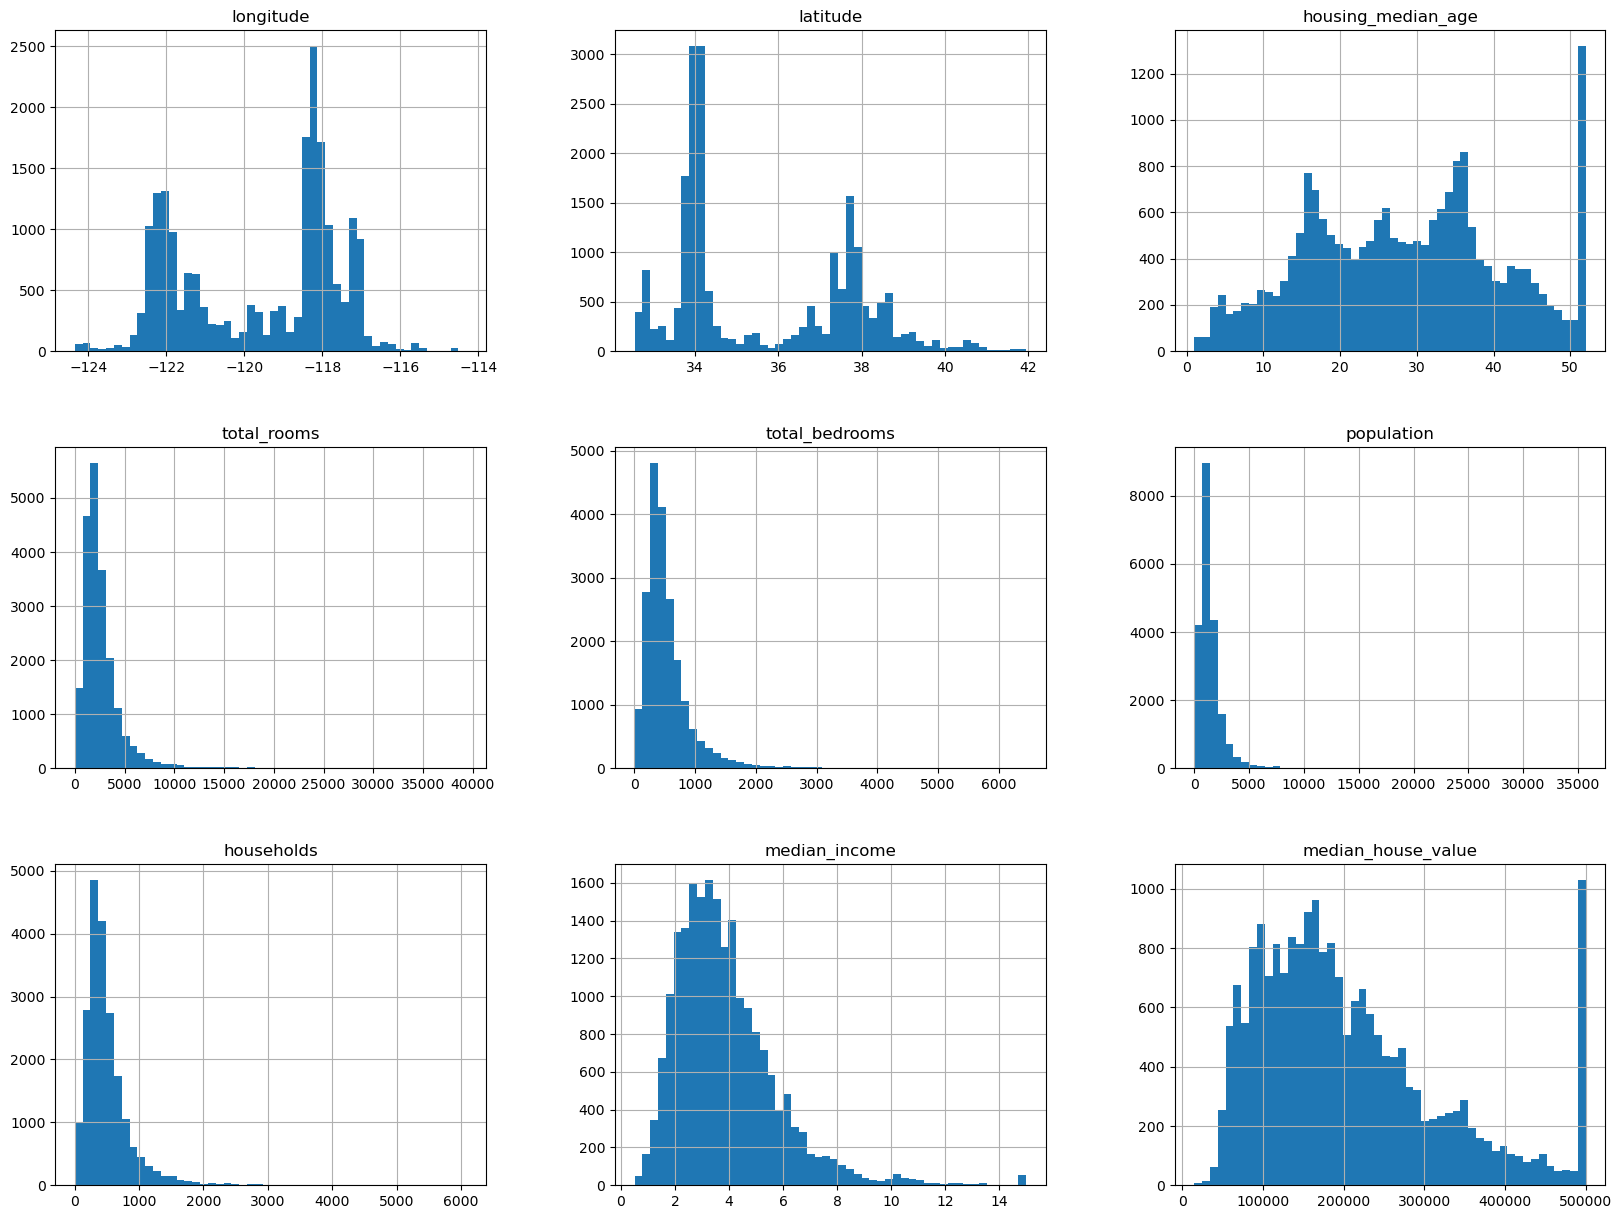

In [81]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()



# Create a training and testing set

In [82]:
import numpy as np

In [83]:
def split_data(data,test_size):
    np.random.seed(1)
    shuffled_indices=np.random.permutation(len(data))
    split_value_ratio=int(len(data)*test_size)
    train_values=shuffled_indices[split_value_ratio:]
    test_values=shuffled_indices[:split_value_ratio]
    return data.iloc[train_values],data.iloc[test_values]

In [84]:
train,test=split_data(housing,0.2)

In [85]:
test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
2319,-119.70,36.82,25.0,2379.0,540.0,1482.0,484.0,2.3173,68200.0,INLAND
5341,-118.44,34.04,49.0,32.0,7.0,14.0,7.0,2.1875,225000.0,<1H OCEAN
16888,-122.37,37.60,26.0,15.0,3.0,11.0,3.0,5.0480,350000.0,NEAR OCEAN
6823,-118.10,34.09,42.0,1460.0,289.0,829.0,273.0,4.8750,227300.0,<1H OCEAN


In [86]:
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15961,-122.43,37.71,52.0,1410.0,286.0,879.0,282.0,3.1908,255600.0,NEAR BAY
1771,-122.35,37.95,42.0,1485.0,290.0,971.0,303.0,3.6094,114600.0,NEAR BAY
16414,-121.24,37.90,16.0,50.0,10.0,20.0,6.0,2.6250,137500.0,INLAND
5056,-118.35,34.02,34.0,5218.0,1576.0,3538.0,1371.0,1.5143,118800.0,<1H OCEAN
8589,-118.39,33.89,38.0,1851.0,332.0,750.0,314.0,7.3356,422700.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


## Stratifing the samples

In [87]:
housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])

<Axes: >

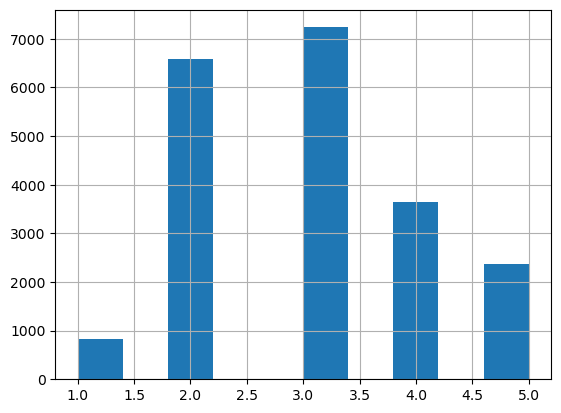

In [88]:
housing['income_cat'].hist()

In [89]:
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [90]:
from sklearn.model_selection import StratifiedShuffleSplit

In [91]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=2)

In [92]:
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [93]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
4118,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404,247700.0,<1H OCEAN,3
11834,-120.22,39.20,22.0,8259.0,1409.0,845.0,353.0,3.3699,244000.0,INLAND,3
17956,-121.97,37.33,21.0,8275.0,1566.0,3636.0,1524.0,5.1506,302100.0,<1H OCEAN,4
20213,-119.22,34.28,33.0,2467.0,377.0,1052.0,363.0,4.7333,257500.0,NEAR OCEAN,4
8061,-118.20,33.84,35.0,3405.0,779.0,1953.0,671.0,2.7813,159200.0,NEAR OCEAN,2
...,...,...,...,...,...,...,...,...,...,...,...
79,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114,131300.0,NEAR BAY,2
9732,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN,4
3420,-118.42,34.28,35.0,822.0,200.0,1197.0,203.0,3.2865,133300.0,<1H OCEAN,3
4902,-118.25,34.01,43.0,1575.0,475.0,1980.0,469.0,1.7425,100500.0,<1H OCEAN,2


In [94]:
housing['income_cat'].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Refer textbook on different sampling methods where u can see that stratified sampling performs better

In [95]:
##removing income_cat
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

### Discover and Visualize the data to gain insights

In [96]:
housing = strat_train_set.copy()

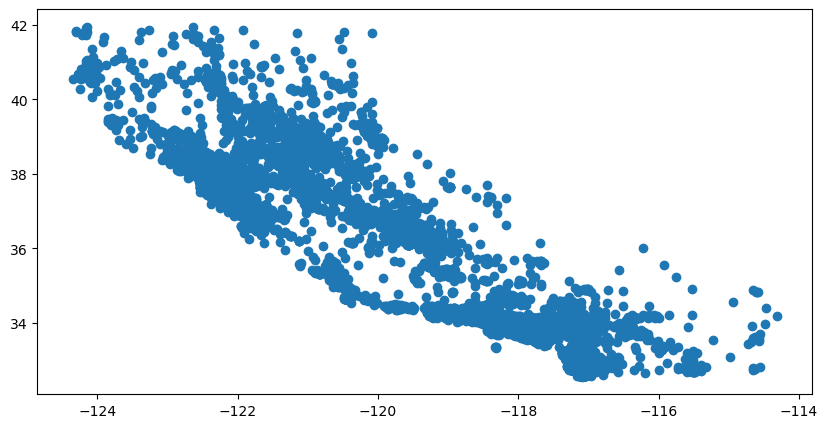

In [97]:
fig,p=plt.subplots(figsize=(10,5))
x = housing['longitude']
y = housing['latitude']
p.scatter(x,y)

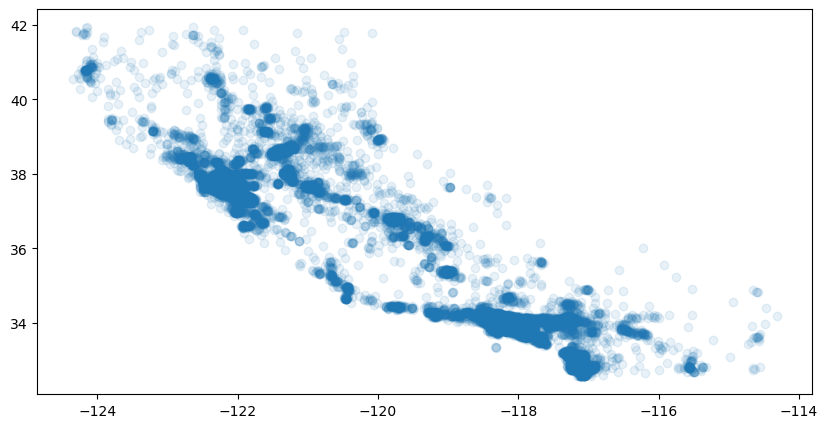

In [98]:
fig,p=plt.subplots(figsize=(10,5))
x = housing['longitude']
y = housing['latitude']
p.scatter(x,y,alpha=0.1) #alpha makes easier to look for high density regions

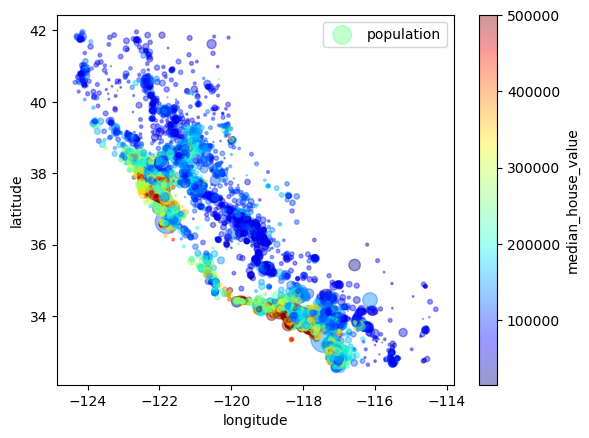

In [99]:
housing.plot(kind='scatter',x ='longitude',y ='latitude',label='population',s=housing['population']/100,alpha=0.4,
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)
#PLOT EXISTS INSIDE OF PANDAS FRAME ALSO

plt.legend()

In [100]:
housing.drop("ocean_proximity",axis=1,inplace=True)

In [101]:
### CHECKING FOR CORRELATIONS

corr_matrix = housing.corr() #checks only linear correlations

In [102]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686643
total_rooms           0.140277
housing_median_age    0.098297
households            0.072940
total_bedrooms        0.056010
population           -0.016968
longitude            -0.045076
latitude             -0.145865
Name: median_house_value, dtype: float64

Another way of describing correlations is by using scatter_matrix function

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

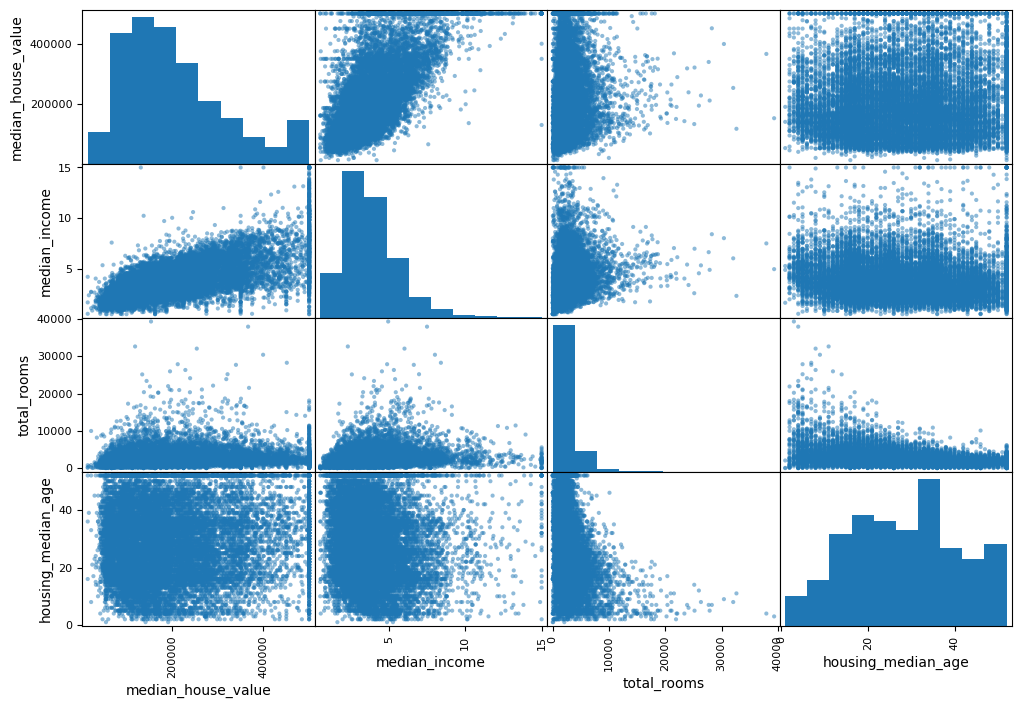

In [103]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
#only dealing with high correlation attributes

scatter_matrix(housing[attributes],figsize=(12,8))

### Observation :- plot between median_house_value and median_income is highly correlated and not too dispersed. Also able to see pattern easily that on increasing median_income median_house_value is increasing

<Axes: xlabel='median_income', ylabel='median_house_value'>

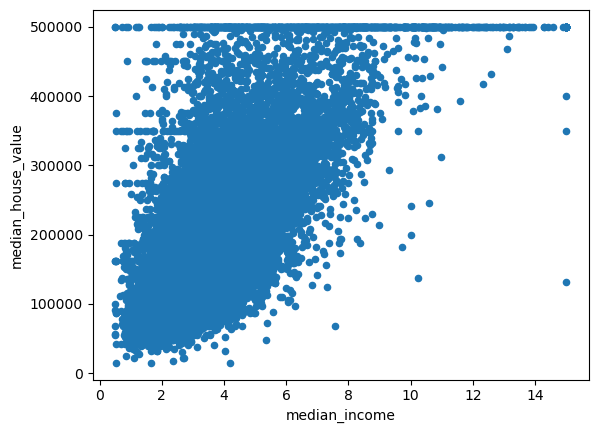

In [104]:
housing.plot(x='median_income',y='median_house_value',kind='scatter')

### Checking with few more combinations for correlations

In [105]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [106]:
corr_matrix = housing.corr()

In [107]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686643
rooms_per_household         0.145981
total_rooms                 0.140277
housing_median_age          0.098297
households                  0.072940
total_bedrooms              0.056010
population                 -0.016968
population_per_household   -0.019465
longitude                  -0.045076
latitude                   -0.145865
bedrooms_per_room          -0.252843
Name: median_house_value, dtype: float64

### rooms per threshold is also showing great correlation

# Prepare the data for machine learning algorithms

In [108]:
housing = strat_train_set.drop("median_house_value",axis=1)
#This creates a copy of strat_train_set dataframe and it doesnt contain median_house_value

In [109]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4118,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404,<1H OCEAN
11834,-120.22,39.20,22.0,8259.0,1409.0,845.0,353.0,3.3699,INLAND
17956,-121.97,37.33,21.0,8275.0,1566.0,3636.0,1524.0,5.1506,<1H OCEAN
20213,-119.22,34.28,33.0,2467.0,377.0,1052.0,363.0,4.7333,NEAR OCEAN
8061,-118.20,33.84,35.0,3405.0,779.0,1953.0,671.0,2.7813,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
79,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114,NEAR BAY
9732,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,<1H OCEAN
3420,-118.42,34.28,35.0,822.0,200.0,1197.0,203.0,3.2865,<1H OCEAN
4902,-118.25,34.01,43.0,1575.0,475.0,1980.0,469.0,1.7425,<1H OCEAN


In [110]:
housing_labels = strat_train_set['median_house_value'].copy()

In [111]:
housing_labels

4118     247700.0
11834    244000.0
17956    302100.0
20213    257500.0
8061     159200.0
           ...   
79       131300.0
9732     221000.0
3420     133300.0
4902     100500.0
2817      51900.0
Name: median_house_value, Length: 16512, dtype: float64

### Data cleaning

In [112]:
strat_train_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        156
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Only total_bedrooms has null values

In [113]:
from sklearn.impute import SimpleImputer

In [114]:
imputer = SimpleImputer(strategy='median')

In [115]:
housing.drop('ocean_proximity',axis=1,inplace=True)

In [116]:
imputer.fit(housing)

SimpleImputer(strategy='median')

In [117]:
imputer.statistics_

array([-118.52   ,   34.26   ,   29.     , 2123.     ,  434.     ,
       1166.     ,  408.5    ,    3.53795])

In [118]:
housing.median().values

array([-118.52   ,   34.26   ,   29.     , 2123.     ,  434.     ,
       1166.     ,  408.5    ,    3.53795])

In [119]:
X = imputer.transform(housing)

In [120]:
X

array([[-1.1822e+02,  3.4140e+01,  5.2000e+01, ...,  7.3500e+02,
         2.3900e+02,  3.7404e+00],
       [-1.2022e+02,  3.9200e+01,  2.2000e+01, ...,  8.4500e+02,
         3.5300e+02,  3.3699e+00],
       [-1.2197e+02,  3.7330e+01,  2.1000e+01, ...,  3.6360e+03,
         1.5240e+03,  5.1506e+00],
       ...,
       [-1.1842e+02,  3.4280e+01,  3.5000e+01, ...,  1.1970e+03,
         2.0300e+02,  3.2865e+00],
       [-1.1825e+02,  3.4010e+01,  4.3000e+01, ...,  1.9800e+03,
         4.6900e+02,  1.7425e+00],
       [-1.1902e+02,  3.5410e+01,  4.1000e+01, ...,  1.1060e+03,
         4.7300e+02,  1.9700e+00]])

In [121]:
housing_tr = pd.DataFrame(X,columns=housing.columns)

In [122]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404
1,-120.22,39.20,22.0,8259.0,1409.0,845.0,353.0,3.3699
2,-121.97,37.33,21.0,8275.0,1566.0,3636.0,1524.0,5.1506
3,-119.22,34.28,33.0,2467.0,377.0,1052.0,363.0,4.7333
4,-118.20,33.84,35.0,3405.0,779.0,1953.0,671.0,2.7813
...,...,...,...,...,...,...,...,...
16507,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114
16508,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272
16509,-118.42,34.28,35.0,822.0,200.0,1197.0,203.0,3.2865
16510,-118.25,34.01,43.0,1575.0,475.0,1980.0,469.0,1.7425


### Handling text and categorical attributes using one hot encoding

In [123]:
from sklearn.preprocessing import OneHotEncoder

Use ocean_proximity attribute to perform one_hot_encoding

In [124]:
housing['ocean_proximity'] = strat_train_set['ocean_proximity'].copy()

In [125]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4118,-118.22,34.14,52.0,1388.0,271.0,735.0,239.0,3.7404,<1H OCEAN
11834,-120.22,39.20,22.0,8259.0,1409.0,845.0,353.0,3.3699,INLAND
17956,-121.97,37.33,21.0,8275.0,1566.0,3636.0,1524.0,5.1506,<1H OCEAN
20213,-119.22,34.28,33.0,2467.0,377.0,1052.0,363.0,4.7333,NEAR OCEAN
8061,-118.20,33.84,35.0,3405.0,779.0,1953.0,671.0,2.7813,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
79,-122.28,37.80,38.0,684.0,176.0,344.0,155.0,2.0114,NEAR BAY
9732,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,<1H OCEAN
3420,-118.42,34.28,35.0,822.0,200.0,1197.0,203.0,3.2865,<1H OCEAN
4902,-118.25,34.01,43.0,1575.0,475.0,1980.0,469.0,1.7425,<1H OCEAN


##### Convert into numerical values before using one hot encoding

In [126]:
from sklearn.preprocessing import LabelEncoder

In [127]:
label_encoder = LabelEncoder()

In [128]:
ocean_prox_num = label_encoder.fit_transform(housing['ocean_proximity'])

In [129]:
np.unique(ocean_prox_num)

array([0, 1, 2, 3, 4])

In [130]:
from sklearn.preprocessing import OneHotEncoder

In [131]:
one = OneHotEncoder()

In [132]:
ocean_prox_cat = one.fit_transform(ocean_prox_num.reshape(-1,1)) 
#fit_transform accepts a 2d array and that is the reason for reshaping the array

In [133]:
ocean_prox_cat #Output will be of sparse matrix class

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [134]:
ocean_prox_cat.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

#####  U can do same thing using LabelBinarizer

## Defining Custom Transformers

### Although Scikit-Learn provides many useful transformers, you will need to write your own for tasks such as custom cleanup operations or combining specific attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance),all you need is to create a class and implement three methods: fit()(returning self), transform(), and fit_transform(). 

In [135]:
from sklearn.base import BaseEstimator,TransformerMixin

In Scikit-Learn, `BaseEstimator` and `TransformerMixin` are base classes that provide certain functionalities to custom estimators and transformers, respectively.

1. **BaseEstimator**:
   - `BaseEstimator` is a class that serves as the base for all estimators in Scikit-Learn.
   - It provides two important methods:
     - `get_params()`: Returns the parameters of the estimator.
     - `set_params()`: Sets the parameters of the estimator.
   - By inheriting from `BaseEstimator`, custom estimators automatically gain these methods, which are useful for hyperparameter tuning, grid search, and other operations that involve inspecting or modifying the parameters of an estimator.

2. **TransformerMixin**:
   - `TransformerMixin` is a mix-in class specifically designed for transformers in Scikit-Learn.
   - It provides implementations for transformer-specific methods.
   - The most important method provided by `TransformerMixin` is `fit_transform()`, which combines the `fit()` and `transform()` methods into a single call.
   - By inheriting from `TransformerMixin`, custom transformers can easily support the `fit_transform()` method, enabling seamless integration into Scikit-Learn pipelines.

Both `BaseEstimator` and `TransformerMixin` are part of Scikit-Learn's design philosophy, which emphasizes consistency, modularity, and ease of use. By leveraging these base classes, developers can ensure that their custom estimators and transformers adhere to Scikit-Learn's API standards, making them compatible with existing tools and workflows in the library.|

In [136]:
rooms_ix,bedrooms_ix,population_ix,households_ix = 3,4,5,6

#### Avoid *args and *kwargs

In [137]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [138]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [139]:
len(housing_extra_attribs[0])

11

#### Two attributes called rooms_per_household and population_per_household are added

In [140]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [141]:
len(housing_extra_attribs[0])

12

### Three attributes called rooms_per_household,population_per_household and add_bedrooms_per_room are added

### In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

## Transformation Pipelines

### Scikit-learn provides Pipeline class which helps to excute sequence of transformations

In [142]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [143]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

In the `num_pipeline` definition:

```python
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
```

The first values within each tuple are strings that serve as identifiers for each step within the pipeline. These identifiers are called "names" or "keys" and are used to refer to each step in the pipeline.

For example:

1. `'imputer'`: This is the name given to the first step in the pipeline, which uses `SimpleImputer` to handle missing values by replacing them with the median of each feature.
   
2. `'attribs_adder'`: This is the name given to the second step in the pipeline, which applies the `CombinedAttributesAdder` transformer to add additional attributes to the dataset.
   
3. `'std_scaler'`: This is the name given to the third step in the pipeline, which uses `StandardScaler` to standardize the features by removing the mean and scaling them to unit variance.

These names are necessary for referencing specific steps in the pipeline, especially when performing operations such as hyperparameter tuning or accessing attributes of individual steps.

Using these names also makes the pipeline more readable and maintainable. If you want to change a specific step in the pipeline or add/remove steps, you can easily identify them by their names rather than their positions within the pipeline.

## Pipelines


The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. All but the last estimator must be transformers (i.e., they must have a `fit_transform()` method). The names can be anything you like (as long as they are unique and don’t contain double underscores "__"): they will come in handy later for hyperparameter tuning.

When you call the pipeline’s `fit()` method, it calls `fit_transform()` sequentially on all transformers, passing the output of each call as the parameter to the next call, until it reaches the final estimator, for which it just calls the `fit()` method. The pipeline exposes the same methods as the final estimator.

<figure>
    <img src="pipeline.png">
</figure>

In [144]:
from my_tools import DataFrameSelector
#class DataFrameSelector is used to select attributes which we have given and converts them into numpy array.

In [145]:
cat_attribs = ['ocean_proximity']

In [146]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler


we know that ocean_proximity attribute has non numeric data and also it is categorical which has to be converted.
we will make a seperate pipeline to perform these steps.

In [147]:
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),
                        ('label_binarizer',LabelBinarizer())])
#LabelBinarizer does both label encoding and one hot encoding 

In [148]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [149]:
num_attribs = list(housing_num)

In [150]:
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),
                        ('Imputer',SimpleImputer(strategy='median')),
                        ('attributes_adder',CombinedAttributesAdder()),
                        ('scaling',StandardScaler())])

### Now we need to combine these pipelines, and it can be done by using the `FeatureUnion` class.


In [151]:
from sklearn.pipeline import FeatureUnion

In [152]:
full_pipeline = FeatureUnion([('num_pipeline',num_pipeline),
                             ('cat_pipeline',cat_pipeline)])

In [153]:
housing_prepared = full_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given



The problem is that pipeline is ASSUMING `LabelBinarizer`'s `fit_transform` method is defined to take three positional arguments:

```python
def fit_transform(self, x, y):
    # ...rest of the code
```

while it is defined to take only two:

```python
def fit_transform(self, x):
    # ...rest of the code
```
This can be solved by creating a custom transformer on our own

In [154]:
class MyLabelBinarizer(BaseEstimator,TransformerMixin):
    def __init__(self,*args,**kwargs):
        self.encoder = LabelBinarizer(*args)
    def fit(self,x,y=0):
        self.encoder.fit(x)
        return self
    def transform(self,x,y=0):
        return self.encoder.transform(x)

Now execute all pipeline codes again

### re executing pipelines once again

In [155]:
cat_pipeline = Pipeline([('selector',DataFrameSelector(cat_attribs)),
                        ('label_binarizer',MyLabelBinarizer())])
#LabelBinarizer does both label encoding and one hot encoding 

In [156]:
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),
                        ('Imputer',SimpleImputer(strategy='median')),
                        ('attributes_adder',CombinedAttributesAdder()),
                        ('scaling',StandardScaler())])

In [157]:
full_pipeline = FeatureUnion([('num_pipeline',num_pipeline),
                             ('cat_pipeline',cat_pipeline)])

In [158]:
housing_prepared = full_pipeline.fit_transform(housing)

In [159]:
housing_prepared

array([[ 0.67915621, -0.70419923,  1.85369098, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31794008,  1.66054132, -0.5284636 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.19039933,  0.78661546, -0.60786876, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.57944658, -0.63877163,  0.50380338, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66419976, -0.76495344,  1.1390446 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.28031769, -0.11067739,  0.9802343 , ...,  0.        ,
         0.        ,  0.        ]])

In [160]:
housing_prepared.shape

(16512, 16)

# Select and train a model

## Training using Linear Regression

In [161]:
from sklearn.linear_model import LinearRegression

In [162]:
model = LinearRegression()

In [163]:
model.fit(housing_prepared,housing_labels)

LinearRegression()

In [164]:
model.coef_

array([-54511.76249079, -55553.96900895,  13114.49145467,  -4228.47638449,
        10227.68421832, -45452.05495186,  44650.32222615,  74866.38569558,
         6255.15543409,    643.14343764,   9095.47617153, -27368.38680098,
       -64318.40206377, 144669.550461  , -30345.28333244, -22637.4782638 ])

In [165]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [166]:
print(f'predictions :{model.predict(some_data_prepared)}')

predictions :[230525.07599855 133198.05689663 324670.73385507 277295.27827516
 200198.8595645 ]


In [167]:
predictions = model.predict(housing_prepared)

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
lin_mse = mean_squared_error(housing_labels,predictions)

In [170]:
lin_rmse = np.sqrt(lin_mse)

In [171]:
lin_rmse

68265.6309152274

## RMSE is very high which suggests model is underfitting which suggests us to choose more complicated model

# Training using Decision Trees

In [172]:
from sklearn.tree import DecisionTreeRegressor

In [173]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [174]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)

In [175]:
tree_mse

0.0

### Perfect model?? It could be overfitting model. let's check with cross validation 

### Evaluation using cross validation

In [176]:
from sklearn.model_selection import cross_val_score

In [177]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [178]:
scores

array([-4.87095661e+09, -4.78213024e+09, -5.70877702e+09, -5.52842790e+09,
       -5.22637882e+09, -5.61756423e+09, -4.87044858e+09, -4.94232126e+09,
       -4.35930349e+09, -4.64255740e+09])

Scikit-Learn’s cross-validation features expect a utility function
(greater is better) rather than a cost function (lower is better), so
the scoring function is actually the opposite of the MSE (i.e., a neg‐
ative value), which is why the preceding code computes -scores
before calculating the square root. 

In [179]:
tree_rmse_scores = np.sqrt(-scores)

In [180]:
def display(scores):
    print("scores:",scores)
    print("mean:",scores.mean())
    print("standard_deviation:",scores.std())

In [181]:
display(tree_rmse_scores)

scores: [69792.23889838 69152.94815682 75556.44921336 74353.39871906
 72293.6983291  74950.41180246 69788.59922819 70301.64478791
 66025.02170214 68136.31480937]
mean: 71035.07256467946
standard_deviation: 2984.128038274855


In [182]:
lin_scores = cross_val_score(model,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [183]:
lin_rmse_scores = np.sqrt(-lin_scores)

In [184]:
display(lin_rmse_scores)

scores: [68510.21613343 71341.51899733 69139.54486523 70041.57429949
 68578.69985151 69071.14801094 67399.12917951 70591.43373697
 67298.14639962 65103.3020969 ]
mean: 68707.4713570932
standard_deviation: 1712.5940550858068


### Mean of rmse of decision tree model is 71035... which is worse than linear regression model 68707.. which tells us that decision tree is performing worse than linear regression model.
### This concludes that model is OVERFITTING.

# Training using Random Forests

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
forest_reg = RandomForestRegressor()

In [187]:
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [188]:
forest_reg_mse = mean_squared_error(housing_labels,housing_predictions)

In [189]:
forest_reg_mse

0.0

### Zero error model but still check for overfitting

In [190]:
rf_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [191]:
rf_rmse_scores = np.sqrt(-rf_scores)

In [192]:
rf_rmse_scores

array([50261.34708808, 51044.95306909, 51605.55843652, 51590.89698058,
       50819.60589645, 50955.72231829, 50365.76023908, 49042.41194926,
       48356.0096432 , 47877.97182902])

In [193]:
display(rf_rmse_scores)

scores: [50261.34708808 51044.95306909 51605.55843652 51590.89698058
 50819.60589645 50955.72231829 50365.76023908 49042.41194926
 48356.0096432  47877.97182902]
mean: 50192.02374495697
standard_deviation: 1254.6669430945021


### Mean of rmse scores is less than decision tree model and linear regression model but still mean rmse is more which tells that this model is also overfits

### Other way to optimize model performance is through fine tuning 

### Fine tune the model using grid search

Grid search is a method for tuning hyperparameters of a machine learning model. It works by evaluating the model's performance on a validation set for each combination of hyperparameter values. The best combination of hyperparameter values is then selected.

Grid search can be used to fine-tune a model that has already been trained. This can be done by training the model on a new dataset with the same hyperparameters, or by training the model on the same dataset with different hyperparameters.

Here are the steps involved in fine-tuning a model using grid search:

1. **Define a hyperparameter grid**: This is a dictionary that contains the hyperparameters that you want to tune and the values that you want to try for each hyperparameter.

2. **Train the model on each combination of hyperparameter values**: This can be done using the `fit()` method of the model.

3. **Evaluate the model's performance on a validation set**: This can be done using the `score()` method of the model.

4. **Select the best combination of hyperparameter values**: This is the combination of hyperparameter values that resulted in the highest score on the validation set.

5. **Train the model on the entire dataset using the best combination of hyperparameter values**: This can be done using the `fit()` method of the model.


In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]}, 
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
#bootstrap samples are used in first dict(default) and not used in second grid they are set to false

1. **n_estimators**:
   - This parameter determines the number of trees in the random forest.
   - It's a list of integer values `[3, 10, 30]`, indicating the number of trees to consider.

2. **max_features**:
   - This parameter determines the maximum number of features to consider for splitting a node.
   - It's a list of integer values `[2, 4, 6, 8]`, indicating the maximum number of features to consider for each split.

3. **bootstrap**:
   - This parameter determines whether bootstrap samples are used when building trees.
   - It's a boolean parameter and is set to `[False]` here, indicating that bootstrap samples are not used.

4. **cv** (cross-validation):
   - This parameter specifies the number of folds for cross-validation.
   - It's set to `5`, meaning the data will be split into 5 folds for cross-validation.

These parameters collectively define the search space for the grid search algorithm. For each combination of parameters specified in the grid, the algorithm will train and evaluate a random forest model using cross-validation. The best combination of parameters will be chosen based on the scoring metric specified (in this case, negative mean squared error).

In [196]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

This `param_grid` tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values specified in the first dict then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the `bootstrap` hyperparameter set to `False` instead of `True` (which is the default value for this hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of `RandomForestRegressor` hyperparameter values, and it will train each model five times (since we are using five-fold cross-validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time.


In [197]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [198]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

### we get rmse is less when max_features are 6 and n_estimators are 30.
### This is the best model which has rmse 49691 which has been improved

In [199]:
cvres = grid_search.cv_results_

In [200]:
for mean_score,param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),param)
    

64137.50106905322 {'max_features': 2, 'n_estimators': 3}
55428.74782395246 {'max_features': 2, 'n_estimators': 10}
52504.89582615165 {'max_features': 2, 'n_estimators': 30}
60696.102785240444 {'max_features': 4, 'n_estimators': 3}
52152.189165797085 {'max_features': 4, 'n_estimators': 10}
50132.39104372139 {'max_features': 4, 'n_estimators': 30}
58881.200356382826 {'max_features': 6, 'n_estimators': 3}
52197.07715118368 {'max_features': 6, 'n_estimators': 10}
49839.75055287212 {'max_features': 6, 'n_estimators': 30}
59280.87054241219 {'max_features': 8, 'n_estimators': 3}
52384.85551374095 {'max_features': 8, 'n_estimators': 10}
49957.11989261621 {'max_features': 8, 'n_estimators': 30}
61836.91176471165 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54235.660387796524 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59117.02675229031 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52541.47425709265 {'bootstrap': False, 'max_features': 3, 'n_estimators'

# Training using RandomizedSearch

In [201]:
from sklearn.model_selection import RandomizedSearchCV

In [202]:
randomized_search = RandomizedSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
randomized_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   scoring='neg_mean_squared_error')

In [203]:
randomized_search.best_params_

{'n_estimators': 30, 'max_features': 6}

In [204]:
randomized_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [205]:
res = randomized_search.cv_results_

In [206]:
for mean_score,param in zip(res['mean_test_score'],res['params']):
    print(np.sqrt(-mean_score),param)
    

52097.520853767935 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
58547.973805715395 {'n_estimators': 3, 'max_features': 4, 'bootstrap': False}
50273.695835629165 {'n_estimators': 30, 'max_features': 8}
55114.8329804685 {'n_estimators': 10, 'max_features': 2}
49951.86283045937 {'n_estimators': 30, 'max_features': 6}
60324.50427905851 {'n_estimators': 3, 'max_features': 4}
62882.35589462343 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
52497.469008611435 {'n_estimators': 10, 'max_features': 6}
58897.369222111105 {'n_estimators': 3, 'max_features': 6}
57948.6543657977 {'n_estimators': 3, 'max_features': 8}


## Mean score for best parameter in randomized search is more than grid search but working faster.so try giving more n_estimators,max_features

In [207]:
param_grid = [
    {'n_estimators':[3,10,30,60,120],'max_features':[2,4,6,8,10,12]}, 
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]

In [208]:
randomized_search = RandomizedSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
randomized_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8, 10, 12],
                                         'n_estimators': [3, 10, 30, 60, 120]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   scoring='neg_mean_squared_error')

In [209]:
randomized_search.best_params_

{'n_estimators': 120, 'max_features': 4}

In [210]:
randomized_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=120)

In [211]:
res = randomized_search.cv_results_

In [212]:
for mean_score,param in zip(res['mean_test_score'],res['params']):
    print(np.sqrt(-mean_score),param)
    

50564.49309333937 {'n_estimators': 30, 'max_features': 12}
52501.39486978377 {'n_estimators': 10, 'max_features': 8}
58920.03413694883 {'n_estimators': 3, 'max_features': 8}
59898.40037863944 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
50473.00764678747 {'n_estimators': 30, 'max_features': 10}
58812.19353076611 {'n_estimators': 3, 'max_features': 10}
49485.135526649516 {'n_estimators': 120, 'max_features': 4}
62615.64107422016 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
51915.8256752094 {'n_estimators': 10, 'max_features': 6}
53317.366568296326 {'n_estimators': 10, 'max_features': 4}


### mean_score 49569 which has been slightly improved than grid search

## Feature Importance

In [213]:
feature_importances = randomized_search.best_estimator_.feature_importances_ 

In [214]:
feature_importances

array([0.08292699, 0.07933378, 0.04202017, 0.02485004, 0.02010157,
       0.02426261, 0.02068064, 0.29877094, 0.06659296, 0.10025359,
       0.0789108 , 0.01873196, 0.12899236, 0.00030292, 0.0057    ,
       0.00756869])

Mention along with the features

In [215]:
extra_attribs = ['rooms_per_household','pop_per_household','bedrooms_per_room']

cat_one_attribs = np.unique(housing['ocean_proximity'])

attributes = num_attribs+extra_attribs+list(cat_one_attribs)

In [216]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'pop_per_household',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [217]:
sorted(zip(feature_importances,attributes),reverse=True) 
#sort is based on first value present in zip (feature_importance)

[(0.29877094270760907, 'median_income'),
 (0.12899236430545594, 'INLAND'),
 (0.10025358570622027, 'pop_per_household'),
 (0.08292698920089181, 'longitude'),
 (0.07933377828520642, 'latitude'),
 (0.07891079613145012, 'bedrooms_per_room'),
 (0.06659295997309121, 'rooms_per_household'),
 (0.042020165239004335, 'housing_median_age'),
 (0.024850036978390038, 'total_rooms'),
 (0.02426261079857818, 'population'),
 (0.020680637623645654, 'households'),
 (0.020101567377520703, 'total_bedrooms'),
 (0.018731961323257225, '<1H OCEAN'),
 (0.007568688255199125, 'NEAR OCEAN'),
 (0.005699995425914936, 'NEAR BAY'),
 (0.00030292066856505665, 'ISLAND')]

# Evaluate your system on test set

In [218]:
final_model = randomized_search.best_estimator_

In [219]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

predictions = final_model.predict(X_test_prepared)


In [220]:
final_mse = mean_squared_error(predictions,y_test)
final_rmse = np.sqrt(final_mse)

In [221]:
final_rmse

48033.73933476454